1.
Study the asymmetric tent map, namely the linear map with peak at $x=c$, $c\neq0.5$
- Draw the histogram of a large number of iterated values.
- Calculate $\lambda$ as time average or space average.

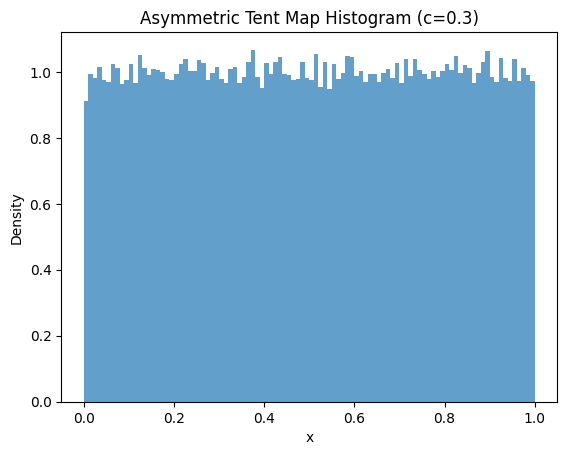

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
c = 0.3  # Asymmetry parameter, c ≠ 0.5
N = 100000  # Number of iterations
x = np.random.rand()  # Initial value

# Store iterates
trajectory = []

for _ in range(N):
    if x < c:
        x = x / c
    else:
        x = (1 - x) / (1 - c)
    trajectory.append(x)

# Plot histogram
plt.hist(trajectory, bins=100, density=True, alpha=0.7)
plt.title(f"Asymmetric Tent Map Histogram (c={c})")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

In [2]:
trajectory = np.array(trajectory)
derivatives = np.where(trajectory < c, 1/c, 1/(c-1))
lyapunov_time = np.mean(np.log(np.abs(derivatives)))
print(f"Lyapunov exponent (time average): {lyapunov_time:.4f}")

Lyapunov exponent (time average): 0.6104


2.
For the same map
- Check that an iterated density converges to the invariant one.
  For this purpose represent the density on a grid of x values.
- Determine the second eigenvalue by subtracting the contribution
  of the leading eigenfunction and rescaling the difference in each step.

3.
For the same map
- Study the decay of correlations. As a first try use $A(x)=x$.

4.
Study the open asymmetric tent map which increases from 0 to 1 in [0,a] and decreases from 1 to 0 in [1-b,1].<br>
You should take into account that using forward iteration the longer you iterate the more initial points are needed. You may use instead backward iteration, choosing one of the two branches randomly in each steps with proper probabilities. In this case you can find out the proper probabilities by studying the effect of the first few steps of iterations.
- Draw the repeller as a histogram of the distribution, and draw the cumulative distribution function.
- Calculate the fractal dimension.